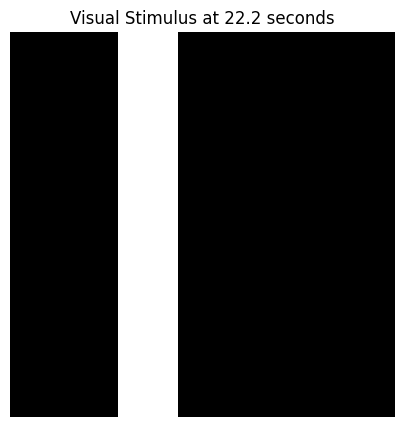

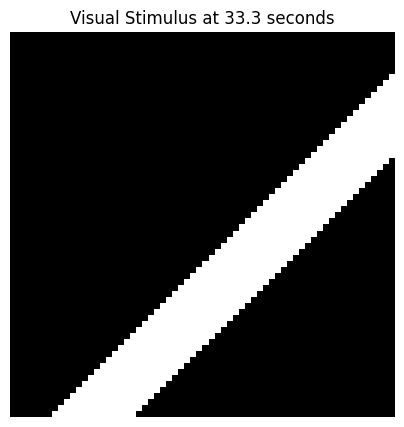

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCREEN_SIZE = 64
BAR_WIDTH = 10
ORIENTATIONS = np.deg2rad([0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5])  # Convert to radians

def d(t):
    """Calculate the distance from origin at time t."""
    return 64 * np.sqrt(2) * ((t % 500) / 500 - 1/2)

def stimulus(t):
    """Generate the visual stimulus matrix at time t."""
    
    # Calculate the bar orientation index based on time
    orientation_index = int(t // 500) % len(ORIENTATIONS)
    phi = ORIENTATIONS[orientation_index]

    # Initialize the stimulus matrix as dark
    stimulus_matrix = np.zeros((SCREEN_SIZE, SCREEN_SIZE))

    # Calculate the current distance from origin
    distance = d(t)

    # Coordinates for the center of the screen
    x0, y0 = SCREEN_SIZE // 2, SCREEN_SIZE // 2

    # Set pixels to illuminated if they fall within the bar
    for i in range(SCREEN_SIZE):
        for j in range(SCREEN_SIZE):
            x = i - x0
            y = j - y0
            if np.abs(np.cos(phi) * x + np.sin(phi) * y - distance) < BAR_WIDTH / 2:
                stimulus_matrix[i, j] = 1
    
    return stimulus_matrix

def plot_stimulus(t):
    """Plot the visual stimulus matrix at time t."""
    plt.figure(figsize=(5, 5))
    plt.imshow(stimulus(t), cmap='gray')
    plt.title('Visual Stimulus at {} seconds'.format(t / 1000))
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.axis('off')
    plt.show()

# Convert time from seconds to milliseconds
plot_stimulus(22.2 * 1000)
plot_stimulus(33.3 * 1000)



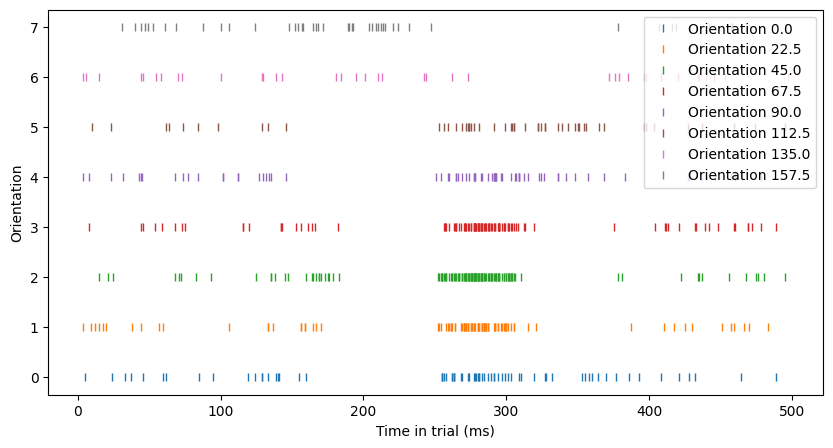

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    with open(filename, 'r') as file:
        data = [int(line.strip()) for line in file]
    return data

def raster_plot(filename):
    data = read_data(filename)
    trials = [[] for _ in range(8)]  # create a list of empty lists for each orientation
    
    for spike_time in data:
        trial = (spike_time // 500) % 8  # calculate trial based on spike time
        spike_time_in_trial = spike_time % 500  # calculate time in trial
        trials[trial].append(spike_time_in_trial)
        
    plt.figure(figsize=(10, 5))
    for i, trial in enumerate(trials):
        plt.plot(trial, [i]*len(trial), '|', label='Orientation {:.1f}'.format(ORIENTATIONS[i] * 180 / np.pi))
        
    plt.xlabel('Time in trial (ms)')
    plt.ylabel('Orientation')
    plt.legend()
    plt.show()

raster_plot('./Data/Cell0.txt')
